In [1]:
import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Used_Bikes.csv")

In [3]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [4]:
df.duplicated().sum()

np.int64(25324)

In [5]:
df1=df.drop_duplicates()

In [6]:
df1.duplicated().sum()

np.int64(0)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   7324 non-null   object 
 1   price       7324 non-null   float64
 2   city        7324 non-null   object 
 3   kms_driven  7324 non-null   float64
 4   owner       7324 non-null   object 
 5   age         7324 non-null   float64
 6   power       7324 non-null   float64
 7   brand       7324 non-null   object 
dtypes: float64(4), object(4)
memory usage: 515.0+ KB


In [8]:
cat_col=df1.select_dtypes(include=object)

In [9]:
cat_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bike_name  7324 non-null   object
 1   city       7324 non-null   object
 2   owner      7324 non-null   object
 3   brand      7324 non-null   object
dtypes: object(4)
memory usage: 286.1+ KB


In [10]:
num_col=df1.select_dtypes(include='Float64')

In [11]:
num_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       7324 non-null   float64
 1   kms_driven  7324 non-null   float64
 2   age         7324 non-null   float64
 3   power       7324 non-null   float64
dtypes: float64(4)
memory usage: 286.1 KB


In [12]:
cat_col=cat_col.drop(["bike_name","city"],axis=1)

In [13]:
cat_col

,owner,brand
0,First Owner,TVS
1,First Owner,Royal Enfield
2,First Owner,Triumph
3,First Owner,TVS
4,First Owner,Yamaha
...,...,...
9362,First Owner,Hero
9369,First Owner,Bajaj
9370,First Owner,Harley-Davidson
9371,First Owner,Bajaj


In [14]:
#label encoding
#one hot encoding
#for changeing the cat in num

In [15]:
pd.get_dummies(cat_col).astype(int).head()

,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,brand_Bajaj,brand_Benelli,brand_Ducati,brand_Harley-Davidson,brand_Hero,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
cat_col["owner"].value_counts()


owner
First Owner             6642
Second Owner             588
Third Owner               84
Fourth Owner Or More      10
Name: count, dtype: int64

In [17]:
dt={
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth Owner Or More": 4
}


In [18]:
cat_col["owner"]=cat_col["owner"].map(dt)

In [19]:
cat_col["brand"].value_counts()

brand
Bajaj              2081
Royal Enfield      1346
Hero               1142
Honda               676
Yamaha              651
TVS                 481
KTM                 375
Suzuki              203
Harley-Davidson      91
Kawasaki             61
Hyosung              53
Mahindra             50
Benelli              46
Triumph              21
Ducati               20
BMW                  10
Jawa                  7
Indian                3
MV                    3
Rajdoot               1
LML                   1
Yezdi                 1
Ideal                 1
Name: count, dtype: int64

In [20]:
dt2={i:key for key,i in enumerate(list(cat_col["brand"].unique()))}


In [21]:
cat_col["brand"]=cat_col["brand"].map(dt2)

In [22]:
cat_col["brand"]

0        0
1        1
2        2
3        0
4        3
        ..
9362     5
9369     6
9370    14
9371     6
9372     6
Name: brand, Length: 7324, dtype: int64

In [23]:
final_col=pd.concat([cat_col,num_col],axis=1)

In [24]:
final_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   owner       7324 non-null   int64  
 1   brand       7324 non-null   int64  
 2   price       7324 non-null   float64
 3   kms_driven  7324 non-null   float64
 4   age         7324 non-null   float64
 5   power       7324 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 400.5 KB


In [26]:
matix= final_col.corr()
matix

,owner,brand,price,kms_driven,age,power
owner,1.000000,0.005844,-0.005188,0.062612,0.203151,0.043746
brand,0.005844,1.000000,0.288409,-0.036161,-0.030263,0.068647
price,-0.005188,0.288409,1.000000,-0.199951,-0.248752,0.807641
kms_driven,0.062612,-0.036161,-0.199951,1.000000,0.367518,-0.168295
age,0.203151,-0.030263,-0.248752,0.367518,1.000000,-0.164211
power,0.043746,0.068647,0.807641,-0.168295,-0.164211,1.000000


<Axes: >

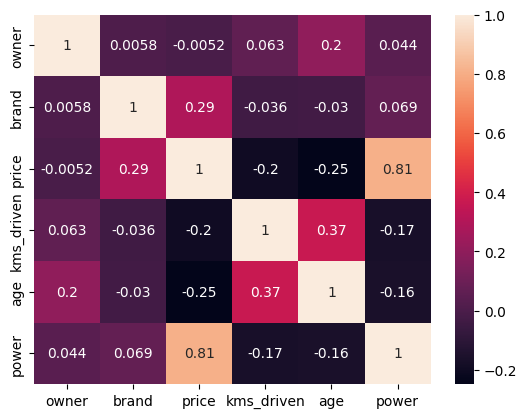

In [27]:
sns.heatmap(matix,annot=True)

In [28]:
x=final_col.drop("price",axis=1)
y=final_col["price"]

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
lr.score(x_train,y_train)

0.7196614526325185